# Regression

Correlation helps to check if two variables are related. If related, identify the type and degree of relationship.

Regression helps to 
1. Identify the exact form of relationship.
2. Model output in terms of input or process variables

General form of simple linear regression:

y = a + bx + e

a = intercept (theoritical value of y when x is 0)
b = slope (Avg change in y per unit change of x)

Parameter estimation

$\hat{a}$ = $\bar{y}$ - $\hat{b}$*$\bar{x}$

$\hat{b}$ = S<sub>xx</sub> / S<sub>xy</sub>

Test for significance: Testing b = 0 or not

It tests significance of relation between x and y

H0 = b = 0;
H1 = b!=0


Test statistic

t0 = ($\hat{b}$ - 0)/ se($\hat{b}$)

If p value is less than 0.05, H0 is rejected & y can be modelled with x

Regression: Issues

For any set of data,a & b can be calculated & Regression model y = a + bx + e can be built. But all the models may not be useful

R<sup>2</sup> <-- coefficient of regression = Amount of Variance explained by regression

R<sup>2</sup> = SS<sub>R</sub> / SS<sub>yy</sub> 

R<sup>2</sup> > 0.6 means the model is reasonably good

**Multiple linear regression**
General form:

y = a + b1x1 + b2x2 + - - - + bkxk + e

Two variable case:

y = a + b1x1 + b2x2 + e

bi = slope(average amount of change in y for unit change in xi keeping all other x's same)

**Exercise**

The effect of temperature and reaction time affects the % yield. The data collected in given in the Mult-Reg_Yield file. Develop a model for % yield in terms of temperature and time?

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from pandas.plotting import scatter_matrix
from scipy import stats

In [9]:
#Import data
data = pd.read_csv('Mult_Reg_Yield.csv')

In [10]:
#Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         16 non-null     int64  
 1   Temperature  16 non-null     int64  
 2   Yield        16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


In [11]:
#Explore the data
data.head()

,Time,Temperature,Yield
0,188,230,84.4
1,190,220,83.3
2,186,235,95.4
3,191,210,98.3
4,178,210,91.4


In [13]:
#Descriptive summary
data.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


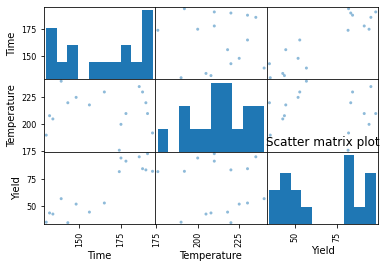

In [14]:
#Preliminary Analysis: Scatter Matrix
scatter_matrix(data)
plt.title('Scatter matrix plot')
plt.show()

It seems that Time has good relationship with Yield.

In [15]:
#Correlation coefficient
round(data.corr(),3)

,Time,Temperature,Yield
Time,1.000,-0.008,0.897
Temperature,-0.008,1.000,-0.055
Yield,0.897,-0.055,1.000


In [16]:
#Copy the fields in new variable
Time = data.Time
Temp = data.Temperature
Output = data.Yield

In [17]:
#Develop the regression model
model = ols('Output~Time+Temp',data = data).fit()

To check a model:
1. Model significance:
p value of F statistics <0.05
2. Model accuarcy:
R<sub>2</sub> > 0.6
3. Model adequacy:
residuals should be normally distributed with mean = 0 

Residual vs Predicted should not have any pattern

4. Model generalizability:

In [18]:
#Check the model
model.summary()

/Users/sudiptarakshit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Output   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Sun, 04 Sep 2022   Prob (F-statistic):           2.32e-05
Time:                        23:07:15   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
Time           0.9061      0.123      7.344      0.000       0.640       1.173
Temp          -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   2.572
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Check the model: Significance**

P value of F statistics < 0.05%

**Check the model: Accuracy**

R<sup>2</sup> > 0.6 : Model good

Adj R<sup>2</sup> > 0.6 : Model good

Adjusted R<sup>2</sup> is correction done on R<sup>2</sup>


Model : Yield = -67.8844 + 0.9061*Time -0.0642* Temp

We find that for Temp, p value >0.05

So, we can remove temp variable from the regression equation.

In [19]:
#Predicted values
predy = model.predict()

In [20]:
#Check the predicted values
predy

array([87.69680424, 90.15087261, 85.56368144, 91.69885237, 79.91970034,
       66.85676605, 77.84332562, 59.47223785, 95.57252226, 51.77420512,
       47.5647076 , 42.65657086, 78.47777573, 40.37274675, 38.36800217,
       37.71122898])

In [21]:
#Convert predicted values to the dataframe
predy = pd.DataFrame(predy,columns =['Predicted'])

In [22]:
#Join the predicted value with the dataset
result = data.join(predy)

In [23]:
#Check my result
result.head()

,Time,Temperature,Yield,Predicted
0,188,230,84.4,87.696804
1,190,220,83.3,90.150873
2,186,235,95.4,85.563681
3,191,210,98.3,91.698852
4,178,210,91.4,79.919700


In [24]:
#Calculate residuals: actual - predicted
res = model.resid

In [25]:
#Convert rediduals to dataframe
res = pd.DataFrame(res,columns=['Residual'])

In [26]:
#Join the residuals with the dataset
result = result.join(res)

In [27]:
#Check result
result.head()

,Time,Temperature,Yield,Predicted,Residual
0,188,230,84.4,87.696804,-3.296804
1,190,220,83.3,90.150873,-6.850873
2,186,235,95.4,85.563681,9.836319
3,191,210,98.3,91.698852,6.601148
4,178,210,91.4,79.919700,11.480300


In [28]:
#We convert the res datatype from dataframe to array
res = res.Residual

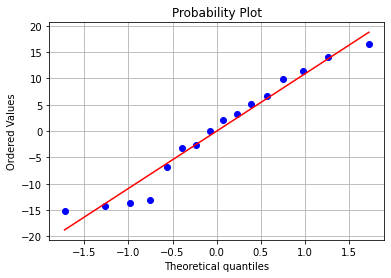

In [29]:
#We do normality test of residuals
stats.probplot(res,plot=plt)
plt.grid()

In [30]:
#Normality test p value
stats.normaltest(a=res)

/Users/sudiptarakshit/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=1.9835487618869185, pvalue=0.3709179570178258)

We find the pvalue=0.3709179570178255, so res is normally distributed.

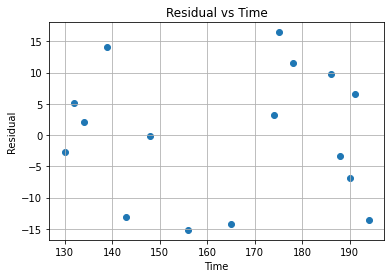

In [31]:
#Residual vs Explanatory variable plot
plt.scatter(Time,res)
plt.title('Residual vs Time')
plt.xlabel('Time')
plt.ylabel('Residual')
plt.grid()
plt.show()

Suppose, there are many explanatory variables. In that we have draw many Residual vs Explanatory variable plots. Instead we can draw Residual vs Predicted value plot since, predited value is a linear function of the explanatory variables.

In [32]:
#Compute the predicted values
predy = model.predict()

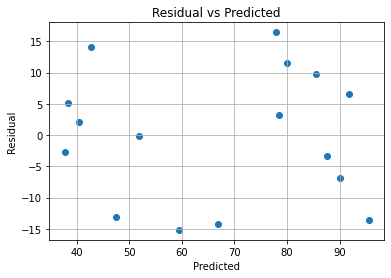

In [33]:
#Residual vs Predicted plot
plt.scatter(x=predy,y=res)
plt.title('Residual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.grid()
plt.show()

In [34]:
#Mean Square Error calculation (MSE)
res_sq = res**2
MSE = res_sq.mean()
round(MSE,3)

102.005

In [36]:
#Root Mean Square Error calculation (RMSE)
RMSE = math.sqrt(MSE)
round(RMSE,3)

10.1

In [37]:
#Residual Sum of Square
res_ss = res_sq.sum()
round(res_ss,3)

1632.081

Residual Sum of Square explains how much the model is not good. Parameter to show how much variability the model can not explain.

In [38]:
#Total Sum of Square
Total_ss = Output.var()*(16-1)
#16 is total number of observations
round(Total_ss,3)

8429.144

In [39]:
#Information the model can not explain 
print(res_ss/Total_ss)
rsq = 1-res_ss/Total_ss
print(rsq)

0.1936236118004731
0.806376388199527


The model can not explain 19% information.

The model can explain 80.6% of total variability in data, which is R<sup>2

**R2 adjusted calculation**

Adj R<sup>2</sup> = 1- (1 - R<sup>2</sup>)*(n-1)/ (n-p-1)

n = no of observations

p = no of expalnatory variables in the model


In [40]:
#Adjusted R2 calculation
adj_r_sq = 1 - (1-rsq)*(16-1)/(16-2-1)
print(adj_r_sq)

0.7765881402302234


|Source | SS |DF|MS|F|P|
| ----------- | ----------- |----|-----|-----|-----|
| Regression | 6797.063|2|3398.5315|27.07029216|2.31861E-05|
| Residual | 1632.081 |13|125.5446923|
|Total|8429.144 |15|

For a good model, MS regression should be very high. i.e, what the model can explain should be higher than what the model can't explain.

F statistic should be greater than 1

DF of Regression = Number of explanatory variables.

DF of total = n-1
